In [115]:
import numpy as np
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
import scipy.constants as const
import pandas as pd
import os

path = os.path.abspath('')
dir_path = os.path.dirname(path)
image_path = dir_path + '/images'

def mittel(arr, s_arr):
    eps = np.sum(1/s_arr**2)
    wps = np.sum(arr/s_arr**2)

    wert = wps/eps
    s_wert = np.sqrt(1/eps)
    
    return np.array([wert, s_wert])

In [116]:
P = pd.DataFrame.to_numpy(pd.read_csv("data/data.txt", delimiter="\t", decimal=".", header=None))[:,0]*100000
R_up = pd.DataFrame.to_numpy(pd.read_csv("data/data.txt", delimiter="\t", decimal=".", header=None))[:,1]
R_down = pd.DataFrame.to_numpy(pd.read_csv("data/data.txt", delimiter="\t", decimal=".", header=None))[:,2]

A = 3.9083*10**(-3)
B = -5.775*10**(-7)
R_0 = 1000
P_0 = 0.977*100000

s_P = 0.5*100000

In [117]:
T_up = (A-np.sqrt(A**2-4*B*(R_up/R_0 -1)))/(2*B) + 273.15
T_down = (A-np.sqrt(A**2-4*B*(R_down/R_0 -1)))/(2*B) + 273.15

s_T_up = 0.3 + 0.005*T_up
s_T_down = 0.3 + 0.005*T_down

In [118]:
def func(x, m, b):
    return m*x+b

fit_up, err_up = opt.curve_fit(func, 1/T_up, np.log(P), sigma=s_P/P)
perr_up = np.sqrt(np.diag(err_up))
fit_down, err_down = opt.curve_fit(func, 1/T_down, np.log(P), sigma=s_P/P)
perr_down = np.sqrt(np.diag(err_down))

print(fit_up, perr_up)
print(fit_down, perr_down)

[-5368.02843365    25.91300321] [69.2975141   0.14418056]
[-5465.85485724    26.11348058] [56.10050619  0.11669044]


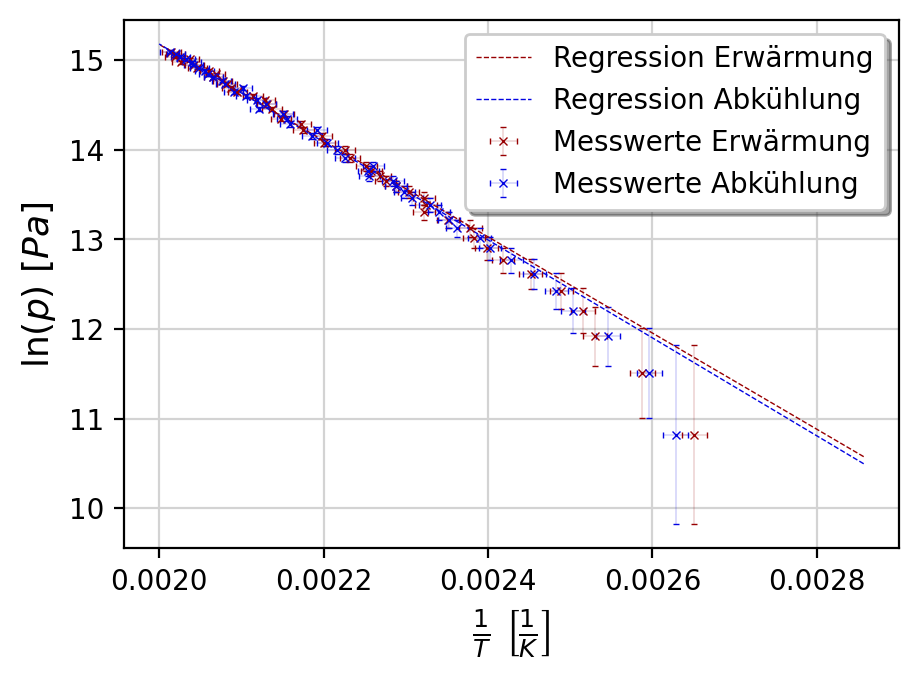

In [119]:
X = np.linspace(1/350, 1/500, 10000)
fig, ax = plt.subplots(figsize=(5, 3.5), dpi = 200)

ax.errorbar( 1/T_up , np.log(P), xerr=s_T_up/T_up**2, yerr= s_P/P, fmt='x', ls='', capsize=1, markersize=3, capthick=0.5, lw=0.1, mew=0.5, color = 'xkcd:blood red', label=r'Messwerte Erwärmung')
ax.errorbar( 1/T_down , np.log(P), xerr=s_T_down/T_down**2, yerr= s_P/P, fmt='x', ls='', capsize=1, markersize=3, capthick=0.5, lw=0.1, mew=0.5, color = 'xkcd:pure blue', label=r'Messwerte Abkühlung')

ax.plot( X , [func(x, fit_up[0], fit_up[1]) for x in X ] , ls = '--', lw = 0.5, color = 'xkcd:blood red',  label=r'Regression Erwärmung')
ax.plot( X , [func(x, fit_down[0], fit_down[1]) for x in X ] , ls = '--', lw = 0.5, color = 'xkcd:pure blue',  label=r'Regression Abkühlung')

# ax.set_ylim(0,4)
# ax.set_xlim(0,2)

ax.set_ylabel(r'$\mathrm{ln}(p)\ [Pa]$',fontsize=13)
ax.set_xlabel(r'$\frac{1}{T}\ \left[ \frac{1}{K} \right]$',fontsize=13)

ax.grid(b=True, color='lightgrey', linestyle='-')
plt.legend(shadow='True')


#plt.show()

filename = 'plot.pgf'
plt.savefig(os.path.join(image_path, filename), bbox_inches="tight")

In [120]:
lam_up = -fit_up[0] * const.gas_constant
lam_down = -fit_down[0] * const.gas_constant

s_lam_up = perr_up[0] * const.gas_constant
s_lam_down = perr_down[0] * const.gas_constant


print(lam_up, s_lam_up, "\n", lam_down, s_lam_down)
print(mittel(np.array([lam_up,lam_down]), np.array([s_lam_up,s_lam_down])))

44632.271743974714 576.1715904672661 
 45445.645885895945 466.4455615785858
[45123.6213957   362.5359764]


In [121]:
P_n = 101325

Ts_up = -fit_up[0]/(fit_up[1]-np.log(P_n))
Ts_down = -fit_down[0]/(fit_down[1]-np.log(P_n))

s_Ts_up = np.sqrt((perr_up[0]/(fit_up[1]-np.log(P_n)))**2+(perr_up[1]*fit_up[0])**2/(fit_up[1]-np.log(P_n))**4)
s_Ts_down = np.sqrt((perr_down[0]/(fit_down[1]-np.log(P_n)))**2+(perr_down[1]*fit_down[0])**2/(fit_down[1]-np.log(P_n))**4)

print(Ts_up, s_Ts_up, "\n", Ts_down, s_Ts_down)
print(mittel(np.array([Ts_up,Ts_down]),np.array([s_Ts_up,s_Ts_down])))

373.11880447308084 6.097765046551373 
 374.697191219359 4.875907549686888
[374.08159032   3.80814606]


In [122]:
T_0 = 273.15

Pd_up = np.exp(fit_up[0]/T_0 + fit_up[1])
Pd_down = np.exp(fit_down[0]/T_0 + fit_down[1])

s_Pd_up = Pd_up*np.sqrt((perr_up[0]/T_0)**2+perr_up[1]**2)
s_Pd_down =  Pd_down*np.sqrt((perr_down[0]/T_0)**2+perr_down[1]**2)

print(Pd_up, s_Pd_up, "\n", Pd_down, s_Pd_down)

print(mittel(np.array([Pd_up, Pd_down]),np.array([s_Pd_up, s_Pd_down])))

523.5818470444864 152.78413765374899 
 447.21030668185915 105.63922037468484
[471.91216511  86.89150239]


In [123]:
h = 2962
g = 9.81
rho_0 = 1.24
lam_t_t = 40590
lam_t, s_lam_t = mittel(np.array([lam_up,lam_down]), np.array([s_lam_up,s_lam_down]))
Ts_t, s_Ts_t = mittel(np.array([Ts_up,Ts_down]),np.array([s_Ts_up,s_Ts_down]))
Ts_t_t = 373.2
H = 8.33*10**3

TZ_t = 1/(1/Ts_t_t + (h*const.gas_constant)/(H*lam_t_t))
TZ = 1/(1/Ts_t + (h*const.gas_constant)/(H*lam_t))
s_TZ = np.sqrt((s_lam_t*H*h*const.gas_constant*Ts_t**2/(H*lam_t+h*const.gas_constant*Ts_t)**2)**2+ (s_Ts_t*H*lam_t/(H*lam_t+h*const.gas_constant*Ts_t)**2)**2)

print(TZ, s_TZ, TZ_t)

365.13233453789746 0.0701807560797645 363.32378243723906
